In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data

In [3]:
start = '2010-01-01'
end = '2021-11-13'

df = data.DataReader('GOOG', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,311.532288,308.832428,311.208527,308.832428,2448744.0,308.832428
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-08,3020.689941,2982.399902,3000.000000,2987.030029,919400.0,2987.030029
2021-11-09,3007.570068,2950.139893,2994.919922,2984.969971,843800.0,2984.969971
2021-11-10,2974.000000,2906.500000,2960.195068,2932.520020,1135400.0,2932.520020
2021-11-11,2970.044922,2933.889893,2942.139893,2934.959961,623200.0,2934.959961
2021-11-12,2997.189941,2929.080078,2956.629883,2992.909912,852000.0,2992.909912


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,311.532288,308.832428,311.208527,308.832428,2448744.0,308.832428
1,2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2,2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
3,2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
4,2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,311.532288,308.832428,311.208527,308.832428,2448744.0
1,313.579620,310.954468,312.304413,312.204773,3927065.0
2,312.747742,309.609497,312.418976,310.829926,6031925.0
3,311.761444,302.047852,311.761444,302.994293,7987226.0
4,303.861053,295.218445,303.562164,295.940735,12876685.0


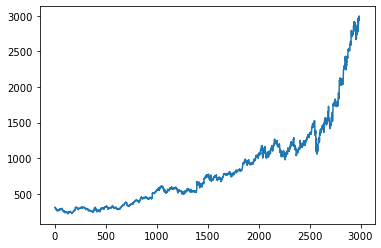

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,311.532288,308.832428,311.208527,308.832428,2448744.0
1,313.579620,310.954468,312.304413,312.204773,3927065.0
2,312.747742,309.609497,312.418976,310.829926,6031925.0
3,311.761444,302.047852,311.761444,302.994293,7987226.0
4,303.861053,295.218445,303.562164,295.940735,12876685.0
...,...,...,...,...,...
2984,3020.689941,2982.399902,3000.000000,2987.030029,919400.0
2985,3007.570068,2950.139893,2994.919922,2984.969971,843800.0
2986,2974.000000,2906.500000,2960.195068,2932.520020,1135400.0
2987,2970.044922,2933.889893,2942.139893,2934.959961,623200.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2984    2758.946401
2985    2763.682600
2986    2767.716799
2987    2771.666499
2988    2776.303298
Name: Close, Length: 2989, dtype: float64

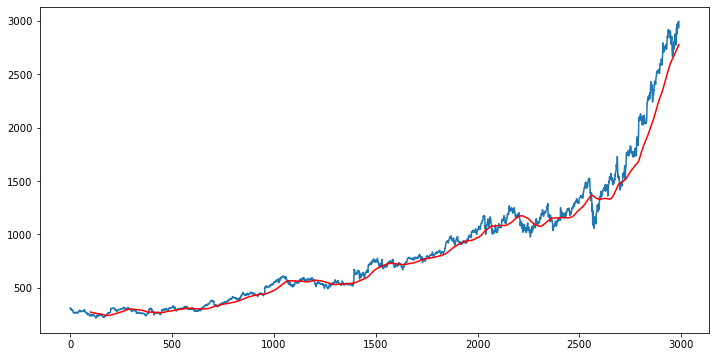

In [10]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2984    2487.138548
2985    2492.477198
2986    2497.985848
2987    2503.345098
2988    2509.130947
Name: Close, Length: 2989, dtype: float64

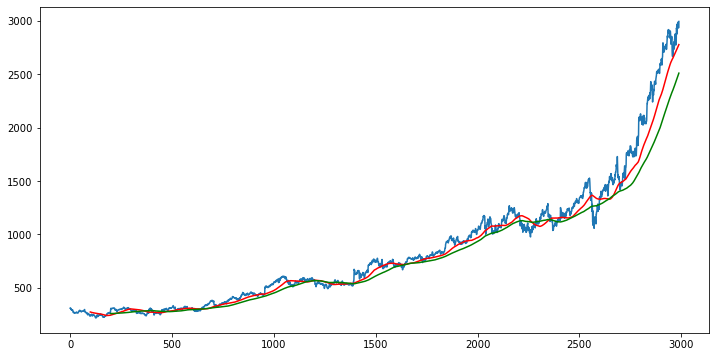

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2989, 5)

In [14]:
# spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2092, 1)
(897, 1)


In [15]:
data_training.head()

,Close
0,308.832428
1,312.204773
2,310.829926
3,302.994293
4,295.940735


In [16]:
data_testing.head()

,Close
2092,1021.179993
2093,1040.040039
2094,1030.050049
2095,1017.330017
2096,1037.310059


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.09556623],
       [0.09908415],
       [0.09764995],
       ...,
       [0.89267896],
       [0.8869311 ],
       [0.83741199]])

In [19]:
data_training_array.shape

(2092, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1992, 100, 1)

In [22]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\shri\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shri\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shri\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shri\anaconda3\envs\tensor

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences='True',
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation='relu', return_sequences='True'))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences='True'))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)


Epoch 1/100
1992/1992 [==============================] - 22s 11ms/step - loss: 0.0385
Epoch 2/100
1992/1992 [==============================] - 20s 10ms/step - loss: 0.0060
Epoch 3/100
1992/1992 [==============================] - 21s 10ms/step - loss: 0.0060
Epoch 4/100
1992/1992 [==============================] - 21s 10ms/step - loss: 0.0055
Epoch 5/100
1992/1992 [==============================] - 21s 10ms/step - loss: 0.0061
Epoch 6/100
1992/1992 [==============================] - 21s 10ms/step - loss: 0.0047
Epoch 7/100
1992/1992 [==============================] - 21s 11ms/step - loss: 0.0045
Epoch 8/100
1992/1992 [==============================] - 21s 11ms/step - loss: 0.0047
Epoch 9/100
1992/1992 [==============================] - 21s 10ms/step - loss: 0.0040
Epoch 10/100
1992/1992 [==============================] - 20s 10ms/step - loss: 0.0036
Epoch 11/100
1992/1992 [==============================] - 20s 10ms/step - loss: 0.0039
Epoch 12/100
1992/1992 [===========================

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2092,1021.179993
2093,1040.040039
2094,1030.050049
2095,1017.330017
2096,1037.310059


In [28]:
data_training.tail(100)

,Close
1992,1021.659973
1993,1021.409973
1994,1010.169983
1995,998.679993
1996,1005.150024
...,...
2087,1072.079956
2088,1087.699951
2089,1072.959961
2090,1067.449951


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

,Close
0,1021.659973
1,1021.409973
2,1010.169983
3,998.679993
4,1005.150024


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02253197],
       [0.02240801],
       [0.01683452],
       [0.01113707],
       [0.01434532],
       [0.02090556],
       [0.02712865],
       [0.03016333],
       [0.03217153],
       [0.0318641 ],
       [0.03192856],
       [0.03616325],
       [0.04362097],
       [0.05004242],
       [0.04683917],
       [0.04399783],
       [0.04334332],
       [0.04160284],
       [0.03992682],
       [0.03627232],
       [0.03566242],
       [0.03479963],
       [0.04402265],
       [0.05269031],
       [0.05463411],
       [0.06248358],
       [0.06481907],
       [0.06448192],
       [0.06267201],
       [0.06411499],
       [0.07241571],
       [0.07216778],
       [0.07723548],
       [0.07614957],
       [0.07997761],
       [0.08905191],
       [0.09607327],
       [0.09323199],
       [0.09627163],
       [0.09898398],
       [0.09885505],
       [0.09295924],
       [0.09605838],
       [0.09494765],
       [0.06727859],
       [0.03946074],
       [0.05175808],
       [0.035

In [32]:
input_data.shape

(997, 1)

In [33]:

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


In [34]:
    
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(897, 100, 1)
(897,)


In [35]:
# making predictions

y_predicted = model.predict(x_test)

In [36]:
y_predicted.shape

(897, 1)

In [37]:
y_test

array([0.02229397, 0.03164595, 0.02669229, 0.02038491, 0.03029226,
       0.02388073, 0.02355345, 0.0356971 , 0.03895991, 0.03852355,
       0.05282916, 0.06017285, 0.06051502, 0.06147697, 0.05107875,
       0.05233826, 0.0507614 , 0.04469701, 0.05125229, 0.04636806,
       0.05130683, 0.05108372, 0.04930855, 0.04170199, 0.04541108,
       0.05393492, 0.07104713, 0.08086026, 0.08104372, 0.07966521,
       0.07320908, 0.07172646, 0.07624872, 0.08087509, 0.07862888,
       0.08722215, 0.08729157, 0.09780383, 0.09512622, 0.09600881,
       0.08996924, 0.08888824, 0.07368018, 0.07053141, 0.06335134,
       0.06842896, 0.06913807, 0.07499417, 0.06281087, 0.0734124 ,
       0.08129662, 0.08817919, 0.08757915, 0.08810479, 0.10277237,
       0.10542026, 0.1029608 , 0.11036901, 0.10892107, 0.10449796,
       0.10348148, 0.11369126, 0.13480505, 0.14255041, 0.14484625,
       0.13005471, 0.12075234, 0.11952261, 0.12088623, 0.12393083,
       0.12272089, 0.12324654, 0.1318993 , 0.13358028, 0.13531

In [38]:
y_predicted

array([[0.11258203],
       [0.11370531],
       [0.11404207],
       [0.11357334],
       [0.11234942],
       [0.1106846 ],
       [0.10886306],
       [0.10710339],
       [0.10567242],
       [0.10476682],
       [0.10445376],
       [0.10483661],
       [0.10599196],
       [0.10785738],
       [0.11026299],
       [0.11291614],
       [0.11552869],
       [0.11785284],
       [0.11961892],
       [0.12071428],
       [0.1210959 ],
       [0.120893  ],
       [0.12030968],
       [0.11953947],
       [0.11865723],
       [0.11776412],
       [0.11704862],
       [0.11679332],
       [0.11724764],
       [0.11849672],
       [0.12046419],
       [0.12291448],
       [0.12556088],
       [0.12817603],
       [0.1305929 ],
       [0.1326547 ],
       [0.13436383],
       [0.13576913],
       [0.13705993],
       [0.13835552],
       [0.13971443],
       [0.14105454],
       [0.1422486 ],
       [0.1430156 ],
       [0.14310633],
       [0.14233081],
       [0.1407359 ],
       [0.138

In [39]:
scaler.scale_

array([0.00049586])

In [40]:
scale_factor = 1/ 0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

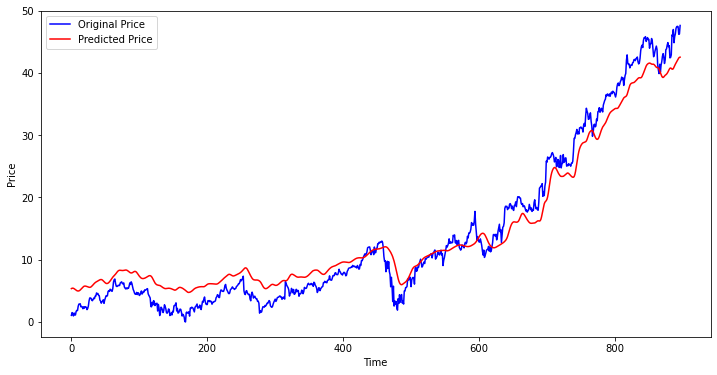

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()